# 1. Evaluate the completeness of data

In [1]:
import pandas as pd
import numpy as np

# Load the datasets
cycles_df = pd.read_csv('cycles.csv')
cycles_df = cycles_df.rename(columns={'id':'cycle_id'})
farms_df = pd.read_csv('farms.csv')

fasting_df1 = pd.read_csv('fasting.csv')
fasting_df2 = pd.read_csv('fastings.csv')
fasting_df = pd.concat([fasting_df1,fasting_df2], axis=0).reset_index(drop=True)
fasting_df['cycle_id'] = fasting_df['cycle_id'].astype(np.int64).astype(str).str.strip()
fasting_df = fasting_df.drop_duplicates().reset_index(drop=True)

feed_tray_df = pd.read_csv('feed_tray.csv')
feeds_df = pd.read_csv('feeds.csv')
harvests_df = pd.read_csv('harvests.csv')
measurements_df = pd.read_csv('measurements.csv')
mortalities_df = pd.read_csv('mortalities.csv')
ponds_df = pd.read_csv('ponds.csv')
samplings_df = pd.read_csv('samplings.csv')

# Display basic information and check for missing values
datasets = {
    'Cycles': cycles_df,
    'Farms': farms_df,
    'Fasting': fasting_df,
    'Feed Tray': feed_tray_df,
    'Feeds': feeds_df,
    'Harvests': harvests_df,
    'Measurements': measurements_df,
    'Mortalities': mortalities_df,
    'Ponds': ponds_df,
    'Samplings': samplings_df
}

for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print(df.info())
    print(df.isnull().sum())
    print(df.head())


Cycles Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                2617 non-null   int64  
 1   pond_id                 2617 non-null   int64  
 2   species_id              1803 non-null   float64
 3   total_seed              2617 non-null   int64  
 4   started_at              2617 non-null   object 
 5   finished_at             2616 non-null   object 
 6   remark                  1336 non-null   object 
 7   created_at              2617 non-null   object 
 8   updated_at              2617 non-null   object 
 9   area                    2617 non-null   float64
 10  initial_age             2569 non-null   float64
 11  limit_weight_per_area   2610 non-null   float64
 12  target_cultivation_day  2614 non-null   float64
 13  target_size             2613 non-null   float64
 14  extracted_at           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8087 entries, 0 to 8086
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cycle_id       8087 non-null   float64
 1   updated_at     8087 non-null   object 
 2   size           8087 non-null   float64
 3   created_at     8087 non-null   object 
 4   weight         8087 non-null   float64
 5   id             8087 non-null   float64
 6   harvested_at   8087 non-null   object 
 7   status         7824 non-null   object 
 8   selling_price  6294 non-null   float64
dtypes: float64(5), object(4)
memory usage: 568.7+ KB
None
cycle_id            0
updated_at          0
size                0
created_at          0
weight              0
id                  0
harvested_at        0
status            263
selling_price    1793
dtype: int64
   cycle_id           updated_at    size           created_at  weight  \
0   15013.0  2022-07-18 08:42:59  399.86  2022-07-18 08:42:59    0.

## data cleaning

In [2]:
#fixing ID to string
dfs = {
    'df1': cycles_df,
    'df2': farms_df,
    'df3': fasting_df,
    'df4': feed_tray_df,
    'df5': feeds_df,
    'df6': harvests_df,
    'df7': measurements_df,
    'df8': mortalities_df,
    'df9': ponds_df,
    'df10': samplings_df
}

for name, features in dfs.items():
    idds = features.columns[(features.columns.str.contains("_id")) | (features.columns == 'id')]
    for col in idds:
        features[col] = features[col].apply(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else str(x))

# Handle missing values
def handle_missing_values(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column].fillna(df[column].median(), inplace=True)
    for column in df.select_dtypes(include=[object]).columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df

cycles_df = handle_missing_values(cycles_df)
farms_df = handle_missing_values(farms_df)
fasting_df = handle_missing_values(fasting_df)
feed_tray_df = handle_missing_values(feed_tray_df)
feeds_df = handle_missing_values(feeds_df)
harvests_df = handle_missing_values(harvests_df)
measurements_df = handle_missing_values(measurements_df)
mortalities_df = handle_missing_values(mortalities_df)
ponds_df = handle_missing_values(ponds_df)
samplings_df = handle_missing_values(samplings_df)

# Convert date columns to datetime
date_columns = ['started_at', 'finished_at', 'created_at', 'updated_at', 'ordered_at', 'extracted_at']
for col in date_columns:
    cycles_df[col] = pd.to_datetime(cycles_df[col], errors='coerce')

date_columns = ['logged_at', 'feed_logged_at','created_at', 'updated_at', 'local_feed_logged_at']
for col in date_columns:
    feed_tray_df[col] = pd.to_datetime(feed_tray_df[col], errors='coerce')

date_columns = ['logged_at']
for col in date_columns:
    feeds_df[col] = pd.to_datetime(feeds_df[col], errors='coerce')

date_columns = ['harvested_at', 'created_at', 'updated_at']
for col in date_columns:
    harvests_df[col] = pd.to_datetime(harvests_df[col], errors='coerce')

date_columns = ['measured_date']
for col in date_columns:
    measurements_df[col] = pd.to_datetime(measurements_df[col], errors='coerce')

date_columns = ['recorded_at', 'created_at', 'updated_at']
for col in date_columns:
    mortalities_df[col] = pd.to_datetime(mortalities_df[col], errors='coerce')

date_columns = ['created_at', 'updated_at', 'extracted_at']
for col in date_columns:
    ponds_df[col] = pd.to_datetime(ponds_df[col], errors='coerce')

date_columns = ['updated_at', 'sampled_at', 'created_at']
for col in date_columns:
    samplings_df[col] = pd.to_datetime(samplings_df[col], errors='coerce')

# 2. Calculate SR and average growth rate (ADG) of shrimp per cultivation cycle

## Survival Rate

In [3]:
def calculate_sr(cycles, harvests):
    merged_df = pd.merge(cycles.rename(columns={'id':'cycle_id'}), harvests, on='cycle_id', how='left')
    merged_df['SR'] = (merged_df['weight'] / merged_df['total_seed']) * 100
    return merged_df[['cycle_id', 'SR']]

sr_df = calculate_sr(cycles_df, harvests_df)
print(sr_df)

     cycle_id        SR
0       18876  0.522867
1       18876  0.035551
2       22118  0.500000
3       22118  0.175000
4       24088  0.261314
...       ...       ...
8549    15868  0.192473
8550    15868  0.060000
8551    20849  0.637258
8552    20849  0.050677
8553    20849  0.002214

[8554 rows x 2 columns]


In [114]:
sr_df.to_csv("SR_datasets.csv", index=False)

## Average Daily Gain (ADG)

In [4]:
def calculate_adg(samplings):
    samplings['sampled_at'] = pd.to_datetime(samplings['sampled_at'])
    samplings = samplings.sort_values(by=['cycle_id', 'sampled_at'])
    samplings['prev_weight'] = samplings.groupby('cycle_id')['average_weight'].shift(1)
    samplings['prev_date'] = samplings.groupby('cycle_id')['sampled_at'].shift(1)
    samplings['days'] = (samplings['sampled_at'] - samplings['prev_date']).dt.days
    samplings['ADG'] = (samplings['average_weight'] - samplings['prev_weight']) / samplings['days']
    adg_df = samplings.groupby('cycle_id')['ADG'].mean().reset_index()
    return adg_df

adg_df = calculate_adg(samplings_df)
print(adg_df)

     cycle_id       ADG
0       10000  0.266667
1       10004  0.550000
2       10005  0.114286
3       10009  0.150000
4       10010  0.398204
...       ...       ...
2302     9984       NaN
2303     9989  0.280833
2304     9993  0.200000
2305     9996       NaN
2306     9998  0.281250

[2307 rows x 2 columns]


In [115]:
adg_df.to_csv("ADG_datasets.csv", index=False)

# 3. Predictive Modeling

## feature engineering 

In [10]:
# Time features
cycles_df['duration_days'] = (cycles_df['finished_at'] - cycles_df['started_at']).dt.days
cycles_df['season_started'] = cycles_df['started_at'].dt.month % 12 // 3 + 1
cycles_df['season_finished'] = cycles_df['finished_at'].dt.month % 12 // 3 + 1

# Aggregated Feed and Fasting Metrics
feed_agg = feeds_df.groupby('cycle_id').agg({
    'quantity': ['sum', 'mean', 'std']
}).reset_index()
feed_agg.columns = ['cycle_id', 'feed_sum', 'feed_mean', 'feed_std']

fasting_agg = fasting_df.groupby('cycle_id').agg({
    'fasting': ['sum', 'mean']
}).reset_index()
fasting_agg.columns = ['cycle_id', 'fasting_days', 'fasting_mean']

# Water Quality Metrics
measurement_agg = measurements_df.groupby('cycle_id').agg({
    'morning_temperature': ['mean', 'std'],
    'evening_temperature': ['mean', 'std'],
    'morning_do': ['mean', 'std'],
    'evening_do': ['mean', 'std'],
    'morning_salinity': ['mean', 'std'],
    'evening_salinity': ['mean', 'std'],
    'morning_pH': ['mean', 'std'],
    'evening_pH': ['mean', 'std']
}).reset_index()
measurement_agg.columns = [
    'cycle_id', 'morning_temp_mean', 'morning_temp_std',
    'evening_temp_mean', 'evening_temp_std', 'morning_do_mean', 'morning_do_std',
    'evening_do_mean', 'evening_do_std', 'morning_salinity_mean', 'morning_salinity_std',
    'evening_salinity_mean', 'evening_salinity_std', 'morning_pH_mean', 'morning_pH_std',
    'evening_pH_mean', 'evening_pH_std'
]

# Spatial Features
farms_df['province_encoded'] = farms_df['province'].astype('category').cat.codes
farms_df['regency_encoded'] = farms_df['regency'].astype('category').cat.codes

ponds_df['pond_size'] = ponds_df['length'] * ponds_df['width'] * ponds_df['deep']

# Biological Metrics
samplings_df['prev_weight'] = samplings_df.groupby('cycle_id')['average_weight'].shift(1)
samplings_df['prev_date'] = samplings_df.groupby('cycle_id')['sampled_at'].shift(1)
samplings_df['days'] = (samplings_df['sampled_at'] - samplings_df['prev_date']).dt.days
samplings_df['ADG'] = (samplings_df['average_weight'] - samplings_df['prev_weight']) / samplings_df['days']
adg_df = samplings_df.groupby('cycle_id')['ADG'].mean().reset_index()

# Merge all features
features_df = cycles_df.merge(feed_agg, on='cycle_id', how='left') \
                       .merge(fasting_agg, on='cycle_id', how='left') \
                       .merge(measurement_agg, on='cycle_id', how='left') \
                       .merge(ponds_df[['id', 'pond_size','farm_id']].rename(columns={'id':'pond_id'}), on='pond_id', how='left') \
                       .merge(farms_df[['id', 'province_encoded', 'regency_encoded']].rename(columns={'id':'farm_id'}), on='farm_id', how='left') \
                       .merge(adg_df, on='cycle_id', how='left')

# Fill any remaining missing values
features_df = features_df.fillna(0)

# Save the feature engineered data for further use
features_df.to_csv('features_df.csv', index=False)

## Hyperparameter Tuning

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

# Load the feature engineered data
# features_df = pd.read_csv('features_df.csv')

# Merge with features
sr_features_df = features_df.merge(sr_df, on='cycle_id', how='left')
sr_features_df = sr_features_df[sr_features_df['SR'].notna()]

# Get only numeric columns for predictions
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = sr_features_df.select_dtypes(include=numerics).columns
num_col = num_col.to_list()
num_col.append('cycle_id')

sr_features_df = sr_features_df[num_col]

# Ensure no NaN, infinite or too large values
sr_features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
sr_features_df.dropna(inplace=True)

# Train-Test Split
X_sr = sr_features_df.drop(columns=['cycle_id', 'SR'])
y_sr = sr_features_df['SR']

# Check for large values
X_sr = X_sr.apply(lambda x: np.where(np.abs(x) > np.finfo(np.float32).max, np.nan, x))
X_sr.dropna(inplace=True)
y_sr = y_sr[X_sr.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sr, y_sr, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Hyperparameter tuning for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=models['Random Forest'], param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Hyperparameter tuning for GradientBoosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_gb = GridSearchCV(estimator=models['Gradient Boosting'], param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(estimator=models['XGBoost'], param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Fit and evaluate models
model_performance = {}
for name, model in zip(['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'], 
                       [models['Linear Regression'], best_rf, best_gb, best_xgb]):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_performance[name] = mse

print("Model Performance (MSE):", model_performance)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Model Performance (MSE): {'Linear Regression': 632.3722772205806, 'Random Forest': 86.47269408192592, 'Gradient Boosting': 260.01273439699264, 'XGBoost': 276.11979860171976}


## Survival Rate

In [102]:
rf_sr = best_rf
rf_sr.fit(X_train, y_train)

y_pred_sr = rf_sr.predict(X_test)
mse_sr = mean_squared_error(y_test, y_pred_sr)
print(f"Survival Rate Model MSE: {mse_sr}")

sr_features_df['SR_Predicted'] = rf_sr.predict(X_sr)

Survival Rate Model MSE: 86.47269408192592


## Average Body Weight

In [30]:
# Prepare data for Average Body Weight prediction
abw_df = samplings_df.groupby('cycle_id')['average_weight'].mean().reset_index()
abw_df.columns = ['cycle_id', 'ABW']

# Merge with features
abw_features_df = features_df.merge(abw_df, on='cycle_id', how='left')

# Get only numeric columns for predictions
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = abw_features_df.select_dtypes(include=numerics).columns
num_col = num_col.to_list()
num_col.append('cycle_id')
abw_features_df = abw_features_df[num_col]

# Ensure no NaN, infinite or too large values
abw_features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
abw_features_df.dropna(inplace=True)

# Train-Test Split
X_abw = abw_features_df.drop(columns=['cycle_id', 'ABW'])
y_abw = abw_features_df['ABW']

# Check for large values
X_abw = X_abw.apply(lambda x: np.where(np.abs(x) > np.finfo(np.float32).max, np.nan, x))
X_abw.dropna(inplace=True)
y_abw = y_abw[X_abw.index]

# Split data into training and testing sets
X_train_abw, X_test_abw, y_train_abw, y_test_abw = train_test_split(X_abw, y_abw, test_size=0.2, random_state=42)

# Fit and evaluate models for ABW
model_performance_abw = {}
for name, model in zip(['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'], 
                       [models['Linear Regression'], best_rf, best_gb, best_xgb]):
    model.fit(X_train_abw, y_train_abw)
    y_pred_abw = model.predict(X_test_abw)
    mse_abw = mean_squared_error(y_test_abw, y_pred_abw)
    model_performance_abw[name] = mse_abw

print("ABW Model Performance (MSE):", model_performance_abw)

ABW Model Performance (MSE): {'Linear Regression': 8.408586510526458, 'Random Forest': 7.025920145461886, 'Gradient Boosting': 7.907125086508285, 'XGBoost': 15.417630291386892}


In [103]:
rf_abw = best_rf
rf_abw.fit(X_train_abw, y_train_abw)

y_pred_abw = rf_abw.predict(X_test_abw)
mse_abw = mean_squared_error(y_test_abw, y_pred_abw)
print(f"ABW Model MSE: {mse_abw}")

abw_features_df['ABW_Predicted'] = rf_abw.predict(X_abw)

ABW Model MSE: 7.025920145461886


## Biomass

In [31]:
# Prepare data for Biomass prediction
harvests_df['biomass'] = harvests_df['weight']
biomass_df = harvests_df.groupby('cycle_id')['biomass'].sum().reset_index()

# Merge with features
biomass_features_df = features_df.merge(biomass_df, on='cycle_id', how='left')

# Get only numeric columns for predictions
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = biomass_features_df.select_dtypes(include=numerics).columns
num_col = num_col.to_list()
num_col.append('cycle_id')
biomass_features_df = biomass_features_df[num_col]

# Ensure no NaN, infinite or too large values
biomass_features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
biomass_features_df.dropna(inplace=True)

# Train-Test Split
X_biomass = biomass_features_df.drop(columns=['cycle_id', 'biomass'])
y_biomass = biomass_features_df['biomass']

# Check for large values
X_biomass = X_biomass.apply(lambda x: np.where(np.abs(x) > np.finfo(np.float32).max, np.nan, x))
X_biomass.dropna(inplace=True)
y_biomass = y_biomass[X_biomass.index]

# Split data into training and testing sets
X_train_biomass, X_test_biomass, y_train_biomass, y_test_biomass = train_test_split(X_biomass, y_biomass, test_size=0.2, random_state=42)

# Fit and evaluate models for Biomass
model_performance_biomass = {}
for name, model in zip(['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'], 
                       [models['Linear Regression'], best_rf, best_gb, best_xgb]):
    model.fit(X_train_biomass, y_train_biomass)
    y_pred_biomass = model.predict(X_test_biomass)
    mse_biomass = mean_squared_error(y_test_biomass, y_pred_biomass)
    model_performance_biomass[name] = mse_biomass

print("Biomass Model Performance (MSE):", model_performance_biomass)

Biomass Model Performance (MSE): {'Linear Regression': 6116579.80875775, 'Random Forest': 28859050.907870866, 'Gradient Boosting': 7808647.121743566, 'XGBoost': 4763162.81474907}


In [104]:
xgb_biomass = best_xgb
xgb_biomass.fit(X_train_biomass, y_train_biomass)

y_pred_biomass = xgb_biomass.predict(X_test_biomass)
mse_biomass = mean_squared_error(y_test_biomass, y_pred_biomass)
print(f"Biomass Model MSE: {mse_biomass}")

biomass_features_df['Biomass_Predicted'] = xgb_biomass.predict(X_biomass)

Biomass Model MSE: 4763162.81474907


In [36]:
# Prepare data for Revenue prediction
harvests_df['revenue'] = harvests_df['weight'] * harvests_df['selling_price']
revenue_df = harvests_df.groupby('cycle_id')['revenue'].sum().reset_index()

# Merge with features
revenue_features_df = features_df.merge(revenue_df, on='cycle_id', how='left')

# Get only numeric columns for predictions
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = revenue_features_df.select_dtypes(include=numerics).columns
num_col = num_col.to_list()
num_col.append('cycle_id')
revenue_features_df = revenue_features_df[num_col]

# Ensure no NaN, infinite or too large values
revenue_features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
revenue_features_df.dropna(inplace=True)

# Train-Test Split
X_revenue = revenue_features_df.drop(columns=['cycle_id', 'revenue'])
y_revenue = revenue_features_df['revenue']

# Check for large values
X_revenue = X_revenue.apply(lambda x: np.where(np.abs(x) > np.finfo(np.float32).max, np.nan, x))
X_revenue.dropna(inplace=True)
y_revenue = y_revenue[X_revenue.index]

# Split data into training and testing sets
X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X_revenue, y_revenue, test_size=0.2, random_state=42)

# Fit and evaluate models for Revenue
model_performance_revenue = {}
for name, model in zip(['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'], 
                       [models['Linear Regression'], best_rf, best_gb, best_xgb]):
    model.fit(X_train_revenue, y_train_revenue)
    y_pred_revenue = model.predict(X_test_revenue)
    mse_revenue = mean_squared_error(y_test_revenue, y_pred_revenue)
    model_performance_revenue[name] = mse_revenue

print("Revenue Model Performance (MSE):", model_performance_revenue)

Revenue Model Performance (MSE): {'Linear Regression': 6.767869780247176e+25, 'Random Forest': 2.8406452316484036e+27, 'Gradient Boosting': 2.6078931462447047e+24, 'XGBoost': 2.2365454670931646e+24}


In [105]:
xgb_revenue = best_xgb
xgb_revenue.fit(X_train_revenue, y_train_revenue)

y_pred_revenue = xgb_revenue.predict(X_test_revenue)
mse_revenue = mean_squared_error(y_test_revenue, y_pred_revenue)
print(f"Revenue Model MSE: {mse_revenue}")

revenue_features_df['Revenue_Predicted'] = xgb_revenue.predict(X_revenue)

Revenue Model MSE: 2.2365454670931646e+24


In [75]:
#Save the model prediction results
sr_features_df.to_csv('Predictions/survival_rate_predictions.csv', index=False)
abw_features_df.to_csv('Predictions/abw_predictions.csv', index=False)
biomass_features_df.to_csv('Predictions/biomass_predictions.csv', index=False)
revenue_features_df.to_csv('Predictions/revenue_predictions.csv', index=False)

# 4. Infer Important Features

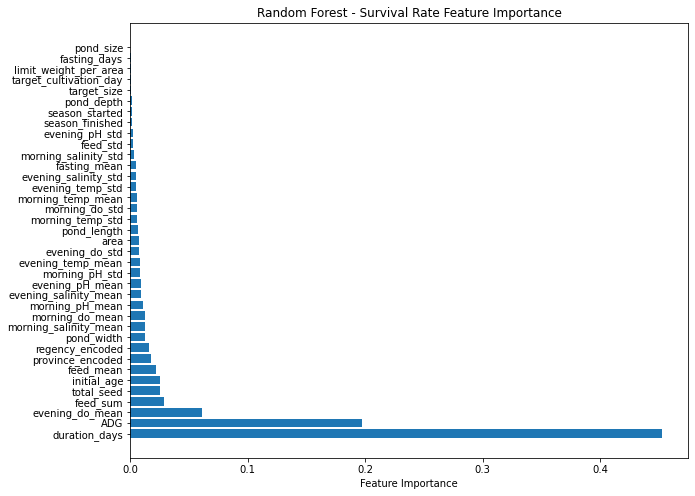

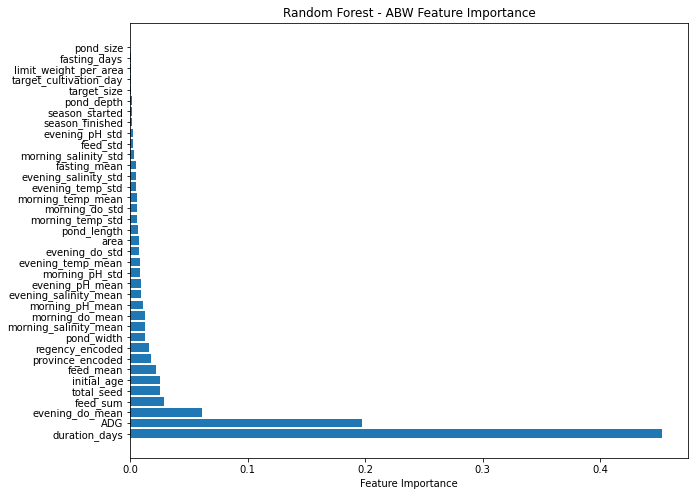

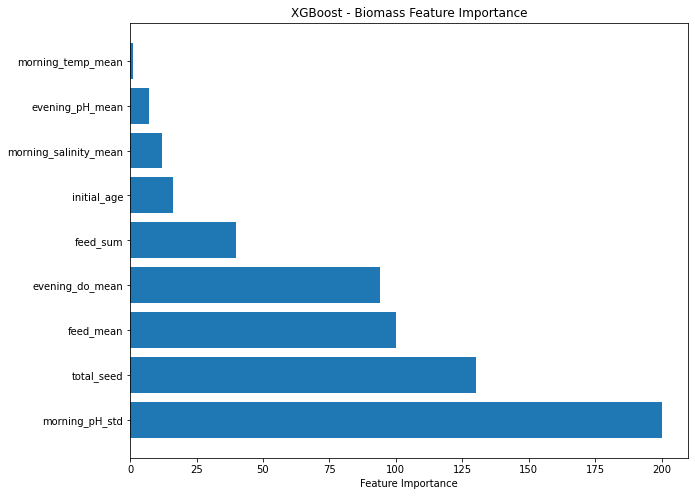

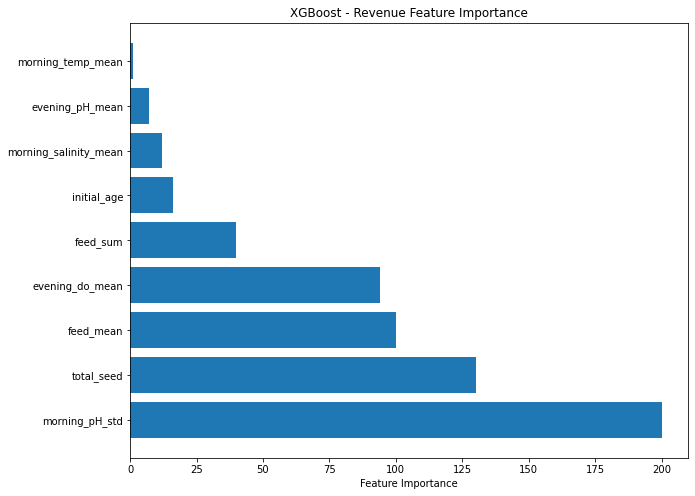

In [109]:
import matplotlib.pyplot as plt

# Function to plot feature importance
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'Feature Names': feature_names, 'Feature Importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['Feature Importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))
    plt.title(model_type + " Feature Importance")
    plt.barh(fi_df['Feature Names'], fi_df['Feature Importance'])
    plt.xlabel('Feature Importance')
    plt.show()

# Survival Rate - Random Forest
rf_sr_importance = rf_sr.feature_importances_
plot_feature_importance(rf_sr_importance, X_sr.columns, 'Random Forest - Survival Rate')

# ABW - Random Forest
rf_abw_importance = rf_abw.feature_importances_
plot_feature_importance(rf_abw_importance, X_abw.columns, 'Random Forest - ABW')

# Biomass - XGBoost
xgb_biomass_importance = xgb_biomass.get_booster().get_score(importance_type='weight')
biomass_importance_values = list(xgb_biomass_importance.values())
biomass_importance_keys = list(xgb_biomass_importance.keys())
plot_feature_importance(biomass_importance_values, biomass_importance_keys, 'XGBoost - Biomass')

# Revenue - XGBoost
xgb_revenue_importance = xgb_revenue.get_booster().get_score(importance_type='weight')
revenue_importance_values = list(xgb_revenue_importance.values())
revenue_importance_keys = list(xgb_revenue_importance.keys())
plot_feature_importance(revenue_importance_values, revenue_importance_keys, 'XGBoost - Revenue')

In [112]:
import pickle
# Save the Random Forest model for Survival Rate
with open('Predictions/rf_sr_model.pkl', 'wb') as f:
    pickle.dump(rf_sr, f)

# Save the Random Forest model for Average Body Weight
with open('Predictions/rf_abw_model.pkl', 'wb') as f:
    pickle.dump(rf_abw, f)

# Save the XGBoost model for Biomass
with open('Predictions/xgb_biomass_model.pkl', 'wb') as f:
    pickle.dump(xgb_biomass, f)

# Save the XGBoost model for Revenue
with open('Predictions/xgb_revenue_model.pkl', 'wb') as f:
    pickle.dump(xgb_revenue, f)